# Experiment stack
The experiment stack for every aspect of the experiment. Using Ejtemaee et al. paper "Optimization of Yb+ Flourescence and hyperfine-qubit detection"


### $^{171}Yb^+$ structure ###
<p align="center">
    <img src="img/Ybstructure.PNG"  height="300" >
    <img src="img/171Yb_cooling_white.png" height="300">
    <img src="img/171Yb_clebsche_gorden_coeffs.PNG" height="300">
</p>


This is the general structure of $^{171}Yb^+$ ions. I will use this to diagramatically show what each part of the experiment is doing.

The cooling cycle is also shown on the two right images. The very right image shows the Clebsch Gordan Coefficiencients for the transitions.

This experiment stack mostly uses the solution to the Lindblad master equation for the $^2S_{1/2}\leftrightarrow^2P_{1/2}$ optical transition using linearly polarised light travelling perpendicular to the $B_z$ quantization axis. The solution is

\begin{equation}
    \mathcal{P}_{p0} = \frac{3}{4}\frac{\cos^2\theta_{BE}\sin^2\theta_{BE}}{1 + 3 \cos^2\theta_{BE}}\frac{\frac{\Omega^2}{3}}{\Delta^2 + \left(\frac{\Gamma_{171}}{2}\right)^2}
\end{equation}

where 

\begin{equation}
    \left(\frac{\Gamma_{171}}{2}\right)^2 = \left(\frac{\gamma}{2}\right)^2 + \frac{\Omega^2}{3}\cos^2\theta_{BE}\frac{1-3\cos^2\theta_{BE}}{1+3\cos^2\theta_{BE}} + \frac{\cos^2\theta_{BE}}{1+3\cos^2\theta_{BE}}\left(\frac{\Omega^4}{36\delta_B^2} + 4\delta_{BE}^2\right).
\end{equation}

is the effective linewidth. $\Omega$ is the Rabi rate which is defined as

\begin{equation}
    \Omega = \Gamma\sqrt{\frac{I}{2I_0}}.
\end{equation}

$\gamma$ is the linewidth of the transition. Decay from $^2P_{1/2}\, F=0$ state to the low lying $^2D_{3/2} \, F=1$ state as well as the counter effect of the 935 nm repump laser is accounted for using

\begin{equation}
    P_{p0}^{(r)} = \frac{\mathcal{P}_{p0}(\alpha=0)}{1 + \xi \mathcal{P}_{p0}(\alpha=0)},
\end{equation}

where the repump factor $\xi$ is defined as

\begin{equation}
    \xi = \frac{\alpha\gamma}{\beta\gamma_{IR}}\frac{1}{\mathcal{P}_{[3/2]}(\beta=0)}.
\end{equation}

$\alpha$ and $\beta$ are the branching ratios for spontaneous decay from $^2P_{1/2}$ to $^2D_{3/2}$ and $^3D[3/2]_{1/2}$ to $^2S_{1/2}$ respectively. $\mathcal{P}_{[3/2]}$ is calculated using (1), just with $\gamma=\gamma_{IR}$ and the Rabi rate for the transition with the 935 nm laser.

## General library functionality ##
This library requires the following packages

In [5]:
# Importing dependencies
import numpy as np
import matplotlib.pyplot as plt

The `ion_model` library has two general classes for modelling the ions dynamics `Yb171` and `Yb174` corresponding to $^{171}Yb^+$ and $^{174}Yb^+$ respectively. They follow the general class structure of the `Yb` class. The `Yb` class contains all of the constants of both the isotopes, including branching ratios, decay rates, energy splittings etc. It also contains some common methods such as the Zeeman shift, rabi freq etc. 

In [6]:
from ion_model import Yb171, Yb174
from pprint import pprint

# Yb data
yb171 = Yb171()
print("Yb constants")
pprint(yb171.__dict__)

Yb constants
{'Gamma_2D32': 18.975332068311197,
 'Gamma_2P12': 123456790.12345679,
 'Gamma_3D32': 26525198.938992042,
 'I370sat': 507.8061565261792,
 'I935sat': 6.711521946069018,
 'branch_ratio_2P12_2D32': 0.018000000000000016,
 'branch_ratio_3D3212_2S12': 0.982,
 'excited_lifetime_2D32': 0.0527,
 'excited_lifetime_2P12': 8.1e-09,
 'excited_lifetime_3D32': 3.77e-08,
 'gamma_2D32_3D3212': 26389378.290154263,
 'gamma_2S12_2P12': 123150432.02071989,
 'hyperfine_splitting_2D32': 5403539364.174444,
 'hyperfine_splitting_2P12': 13226105071.61303,
 'hyperfine_splitting_2S12': 79438311838.67151,
 'hyperfine_splitting_3D32': 13885839528.866886,
 'lambda_2D32_3D3212': 9.352e-07,
 'lambda_2S12_2P12': 3.695e-07,
 'mu_b': 87941000538.0187,
 'optimal_thetaBE': 0.9553166181245092,
 'zeeman_P_state_proportion': 0.3333333333333333,
 'zeeman_S_state_proportion': 1}


In [7]:
print("\nYb methods")
pprint([var for var in dir(yb171) if '__' not in var and callable(getattr(yb171, var))])


Yb methods
['effective_linewidth',
 'eta',
 'excited_population_no_leakage',
 'excited_population_with_leakage',
 'rabi_freq',
 's0',
 'zeeman_shift']


There are also functions that make generating plots easy. These include `calculate_171_pop` and `calculate_174_pop`. These functions take in the following parameters

```
detuning: Union[np.array, float],
I935: Union[np.array, float, None] = None,
I370: Union[np.array, float, None] = None,
thetaBE: Union[np.array, float, None] = None,
b_field: Union[PolarVector, None] = None,
e_field: Union[PolarVector, None] = None,
b_mag: Union[np.array, float, None] = None,
zeeman: Union[np.array, float, None] = None,
s_370: Union[np.array, float, None] = None,
s_935: Union[np.array, float, None] = None
```

They return

```
excited_pop: Union[np.ndarray, float],   # Excited state population as a function of the variables
mesh: Union[np.ndarray, float],          # A meshgrid of the variables
yb171: Yb,                               # The Yb171 or Yb174 class
cart: ,                                  # The cartesian coordinates of the Efield and Bfield vectors if they are given using as PolarVectors
other_data                               # A dictionary of other data that could be useful for plotting. This includes
                                         # {370: {"s0": mesh.s0_370,
                                         #          "rabi": rabi_370,
                                         #          "zeeman": mesh.zeeman,
                                         #          "linewidth": eff_linewidth_370,
                                         #          "pop": excited_pop_370},
                                         #  935: {"s0": mesh.s0_935,
                                         #          "rabi": rabi_935,
                                         #          "linewidth": eff_linewidth_935,
                                         #          "pop": excited_pop_935},
                                         #  "eta": eta}
```


### Sweeping the polarisation of the 370 nm laser ###
This is done experimentally using the ConOptics EOM. It has the effect of changing from pumping only $\pi$ transitions (population trapping on the $m_F=\pm 1$ Zeeman sub-levels), to equal pumping of $\pi$, $\sigma^\pm$ and then pumping of the $\sigma^\pm$ transitions and no $\pi$. See Image for example
<p align="center">
    <img src="img/Polarisation_sweep.png" height="300">
</p>

(a) shows the optical pumping into the $m_F=\pm 1$ Zeeman levels due to pure a $\pi$ transition. This occurs when $\theta_{BE}=\frac{\pi}{2}$, where $\theta_{BE}$ is the angle between the electric field of the cooling laser and the magnetic field $B_z$. (b) shows the maximum flouresence when all three transitions are $\sigma^\pm$, $\pi$ are driven equally. This occurs when $\theta_{BE}=\cos^{-1}(\frac{1}{\sqrt{3}})$. This is calculated from the Clebsch-Gordan coefficients. (c) shows optical pumping into the $m_F=0$ Zeeman state due to an equal amount of $\sigma^\pm$ pumping and no $\pi$ pumping. This occurs when $\theta_{BE}=\pi$. 

This can be simulated using the following code;

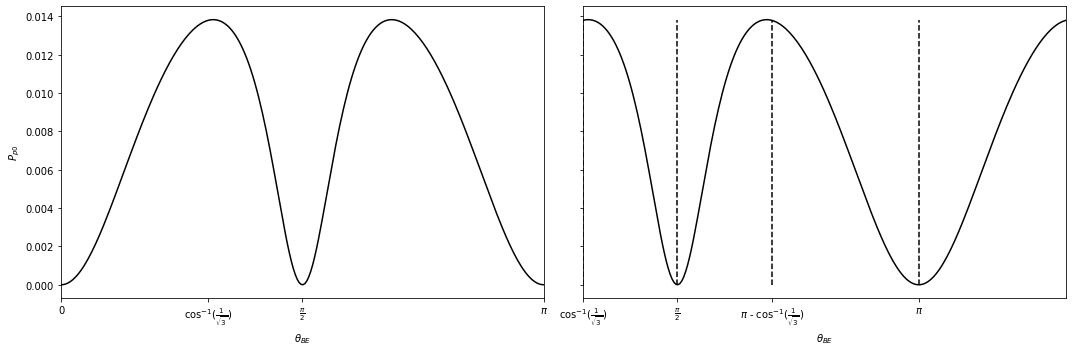

In [8]:
from ion_model import calculate_171_pop, Yb171

yb171 = Yb171()
# define the polarisation sweep
thetaBE370 = np.linspace(0, 2*np.pi, 500)
thetaBE935 = yb171.optimal_thetaBE
# define other constants
s370 = 1                            # At saturation
s935 = 1                            # At saturation
zeeman = 0.5 * yb171.Gamma_2P12     # half of the linewidth of the 2S1/2 <-> 2P1/2 transition
detuning370 = 0.5 * yb171.Gamma_2P12   # Detuning from excited state by half of the linewidth of the 2S1/2 <-> 2P1/2 transition

# Calculate the population
excited_pop, mesh, yb171, other = calculate_171_pop(detuning370=detuning370, s_370=s370, s_935=s935, zeeman=zeeman, 
                                                                thetaBE370=thetaBE370, 
                                                                thetaBE935=thetaBE935)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5), sharey=True)
ax1.plot(mesh.thetaBE370, excited_pop, color='k')
ax1.set_xlim(0, np.pi)
ax1.set_xticks([0, np.arccos(1/np.sqrt(3)), np.pi/2, np.pi])
ax1.set_xticklabels(["0", r"$\cos^{-1}(\frac{1}{\sqrt{3}})$", r"$\frac{\pi}{2}$", "$\pi$"])

ax2.plot(mesh.thetaBE370, excited_pop, color='k')
ax2.set_xlim(np.arccos(1/np.sqrt(3)), np.arccos(1/np.sqrt(3))+np.pi)
ax2.set_xticks([np.arccos(1/np.sqrt(3)), np.pi/2, np.pi - np.arccos(1/np.sqrt(3)), np.pi])
ax2.set_xticklabels([r"$\cos^{-1}(\frac{1}{\sqrt{3}})$", r"$\frac{\pi}{2}$", r"$\pi$ - $\cos^{-1}(\frac{1}{\sqrt{3}})$", "$\pi$"])

ax2.vlines([np.arccos(1/np.sqrt(3)), np.pi/2, np.pi - np.arccos(1/np.sqrt(3)), np.pi], ymin=0, ymax=max(excited_pop), color='k', linestyles='--')

ax1.set_ylabel(r'$P_{p0}$')
ax1.set_xlabel(r'$\theta_{BE}$')
ax2.set_xlabel(r'$\theta_{BE}$')

plt.tight_layout()
plt.show()


### Sweeping saturation parameter $s$ of 370 nm laser ###
In $^{171}Yb^+$ ions, as you increase the saturation parameter $s$ for the 370 nm transition, you can get population trapping (for some reason). Increasing the Zeeman splitting destabilises the trapping. This can be modelled using the following

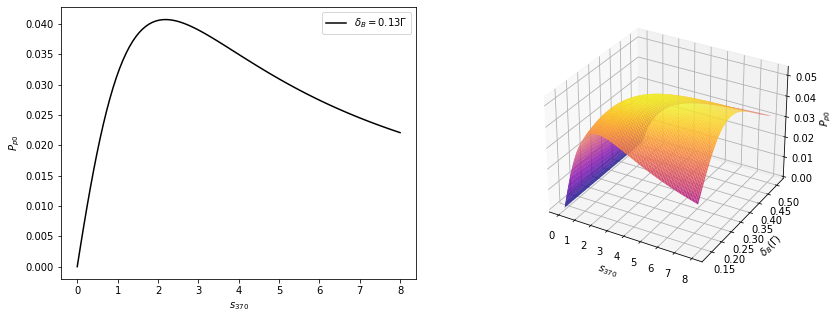

In [9]:
from ion_model import calculate_171_pop, Yb171

yb171 = Yb171()

# define the polarisation sweep
thetaBE370 = yb171.optimal_thetaBE
thetaBE935 = thetaBE370
# define other constants
s370 = np.linspace(0, 8, 100)       # At saturation
s935 = 1                            # At saturation
zeeman = 0.13 * yb171.Gamma_2P12     # half of the linewidth of the 2S1/2 <-> 2P1/2 transition
detuning370 = 5e6 * 2 * np.pi           # Detuning set to -5 MHz

# Calculate the population
excited_pop, mesh, yb171, other = calculate_171_pop(detuning370=detuning370, s_370=s370, s_935=s935, zeeman=zeeman, 
                                                                thetaBE370=thetaBE370, 
                                                                thetaBE935=thetaBE935)

fig = plt.figure(figsize=(14, 5))
ax = fig.add_subplot(1, 2, 1)
ax.plot(mesh.s0_370, excited_pop, color='k', label=r'$\delta_B=0.13\Gamma$')

zeeman = np.linspace(0.13, 0.51, 100)     # half of the linewidth of the 2S1/2 <-> 2P1/2 transition

# Calculate the population
excited_pop, mesh, yb171, other = calculate_171_pop(detuning370=detuning370, s_370=s370, s_935=s935, zeeman=zeeman * yb171.Gamma_2P12, 
                                                                thetaBE370=thetaBE370,
                                                                thetaBE935=thetaBE935)

ax2 = fig.add_subplot(1, 2, 2, projection='3d')
ax2.plot_surface(mesh.s0_370, mesh.zeeman / yb171.Gamma_2P12, excited_pop, cmap='plasma', rstride=1, cstride=1, edgecolor='none')
ax2.set_xlabel('$s_{370}$')
ax2.set_ylabel('$\delta_B(\Gamma)$')
ax2.set_zlabel("$P_{p0}$")

ax.set_xlabel('$s_{370}$')
ax.set_ylabel('$P_{p0}$')
ax.legend()

# plt.tight_layout()
plt.show()

Notice in the code for plotting the second graph we used two variables set using np.arrays `s_370` and `zeeman`. When we put these arrays into the `calculate_171_pop` function we get a `mesh` object as the second result. The `mesh` object contains the attributes
```
"thetaBE", 
"detuning", 
"s0_370", 
"s0_935", 
"zeeman"
```
This can be easily printed from the mesh object itself

In [10]:
pprint(list(mesh.__dict__.keys()))

['names',
 'thetaBE370',
 'thetaBE935',
 'detuning370',
 'detuning935',
 's0_370',
 's0_935',
 'zeeman',
 'variables_forming_meshgrid',
 'mesh_order',
 'variables_names',
 'mesh_shape']


Note that `names` is just a holder of the names given above. `mesh_order` and `mesh_shape` can be used to help figure out what axes represents different variables if using multi-dimensional arrays. 

### Sweeping 370 nm detuning $\Delta$ ###
Looking at eq.(1), then it is clear that by sweeping $\Delta$ we get a Lorentzian with a HWHM of $\frac{\Gamma_{171}}{2}$. Changing the detuning can be shown on the Yb grotrian diagram as

<p align="center">
<img src="img/171Yb 370 detuning.png" height="300">
</p>

In this diagram I have drawn the Natural linewidth (not to scale) of the $^2P_{1/2}\: F=0$ in red. The detuning is swept from some negative value to some postive value past the resonance. In reality, going above the resonance would heat the ion and lead to it being lost from the trap. The other two schematics show how changing the Zeeman splitting can lead to a different effective linewidth. 

This can be simulated using the following

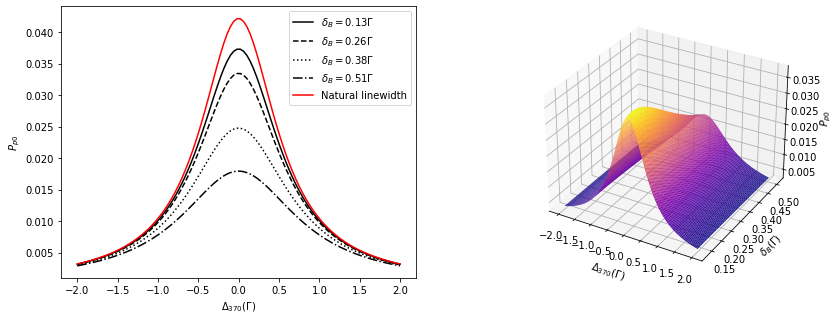

In [11]:
from ion_model import calculate_171_pop, Yb171, Lorentzian

yb171 = Yb171()

# define the polarisation sweep
thetaBE370 = yb171.optimal_thetaBE
thetaBE935 = thetaBE370
# define other constants
s370 = 1                            # At saturation
s935 = 1                            # At saturation
zeeman = np.linspace(0.13, 0.51, 4)     # half of the linewidth of the 2S1/2 <-> 2P1/2 transition
detuning370 = np.linspace(-2, 2, 100) * yb171.Gamma_2P12  # Detuning set to -5 MHz

# Calculate the population
excited_pop, mesh, yb171, other = calculate_171_pop(detuning370=detuning370, s_370=s370, s_935=s935, zeeman=zeeman * yb171.Gamma_2P12, 
                                                                thetaBE370=thetaBE370,
                                                                thetaBE935=thetaBE935)

fig = plt.figure(figsize=(14, 5))
ax = fig.add_subplot(1, 2, 1)
linestyles = ['solid', '--', ':', '-.']
for i, det in enumerate(zeeman):
    ax.plot(mesh.detuning370[i, :] / yb171.Gamma_2P12, excited_pop[i, :], color='k', label=f'$\delta_B={round(det, 2)}\Gamma$', linestyle=linestyles[i])
# Also plot natural linewidth of the 2P1/2 F=0 state
Pp0 = yb171.excited_population_no_leakage(other[370]['rabi'], other[370]['linewidth'], mesh.thetaBE370, mesh.detuning370)
# natural_spectrum = Lorentzian(detuning370, 0, yb171.Gamma_2P12) * 10e6
ax.plot(mesh.detuning370[0, :]/yb171.Gamma_2P12, Pp0[0, :], color='r', label='Natural linewidth')


zeeman = np.linspace(0.13, 0.51, 100)     # half of the linewidth of the 2S1/2 <-> 2P1/2 transition

# Calculate the population
excited_pop, mesh, yb171, other = calculate_171_pop(detuning370=detuning370, s_370=s370, s_935=s935, zeeman=zeeman * yb171.Gamma_2P12,
                                                                thetaBE370=thetaBE370,
                                                                thetaBE935=thetaBE935)

ax2 = fig.add_subplot(1, 2, 2, projection='3d')
ax2.plot_surface(mesh.detuning370 / yb171.Gamma_2P12, mesh.zeeman / yb171.Gamma_2P12, excited_pop, cmap='plasma', rstride=1, cstride=1, edgecolor='none')
ax2.set_xlabel('$\Delta_{370}(\Gamma)$')
ax2.set_ylabel('$\delta_B(\Gamma)$')
ax2.set_zlabel("$P_{p0}$")

ax.set_xlabel('$\Delta_{370}(\Gamma)$')
ax.set_ylabel('$P_{p0}$')
ax.legend()

# plt.tight_layout()
plt.show()

### Sweeping saturation parameter $s_{935}$ of 935 nm laser 

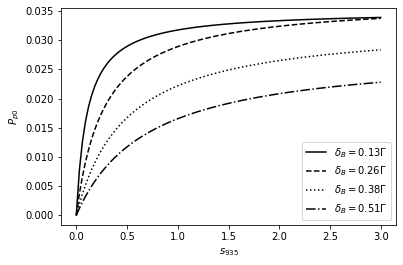

In [12]:
from ion_model import calculate_171_pop, Yb171, Lorentzian

yb171 = Yb171()

# define the polarisation sweep
thetaBE370 = yb171.optimal_thetaBE
thetaBE935 = yb171.optimal_thetaBE
# define other constants
s370 = 1                                # At saturation
s935 = np.linspace(0, 3, 100)           # At saturation
zeeman = np.linspace(0.13, 0.51, 4)     # half of the linewidth of the 2S1/2 <-> 2P1/2 transition
detuning370 = 5e6 * 2 * np.pi           # Detuning set to -5 MHz

linestyles = ['solid', '--', ':', '-.']

# Calculate the population
excited_pop, mesh, yb171, other = calculate_171_pop(detuning370, s_370=s370, s_935=s935, zeeman=zeeman * yb171.Gamma_2P12,
                                                                thetaBE370=thetaBE370,
                                                                thetaBE935=thetaBE935)

for i, det in enumerate(zeeman):
    plt.plot(mesh.s0_935[i, :], excited_pop[i, :], linestyle=linestyles[i], color='k', label=f'$\delta_B={round(det, 2)}\Gamma$')
plt.ylabel('$P_{p0}$')
plt.xlabel('$s_{935}$')
plt.legend()
plt.show()

### Sweeping 935 nm detuning $\Delta_{935}$ 

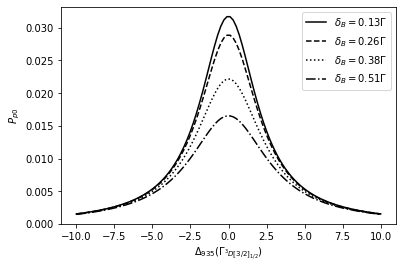

In [13]:
from ion_model import calculate_171_pop, Yb171, Lorentzian

yb171 = Yb171()

# define the polarisation sweep
thetaBE370 = yb171.optimal_thetaBE
thetaBE935 = yb171.optimal_thetaBE
# define other constants
s370 = 1                                # At saturation
s935 = 1                                # At saturation
zeeman = np.linspace(0.13, 0.51, 4)     # half of the linewidth of the 2S1/2 <-> 2P1/2 transition
detuning370 = 5e6 * 2 * np.pi              # Detuning set to -5 MHz
detuning935 = np.linspace(-10, 10, 100) * yb171.Gamma_3D32

linestyles = ['solid', '--', ':', '-.']

# Calculate the population
excited_pop, mesh, yb171, other = calculate_171_pop(detuning370=detuning370, detuning935=detuning935,
                                                                s_370=s370, 
                                                                s_935=s935, 
                                                                zeeman=zeeman * yb171.Gamma_2P12, 
                                                                thetaBE370=thetaBE370,
                                                                thetaBE935=thetaBE935)

for i, det in enumerate(zeeman):
    plt.plot(mesh.detuning935[i, :]/yb171.Gamma_3D32, excited_pop[i, :], linestyle=linestyles[i], color='k', label=f'$\delta_B={round(det, 2)}\Gamma$')
plt.ylabel('$P_{p0}$')
plt.xlabel('$\Delta_{935}(\Gamma_{^3D[3/2]_{1/2}})$')
plt.legend()
plt.show()

### Sweeping 935 nm polarisation $\theta_{BE, 935}$ 

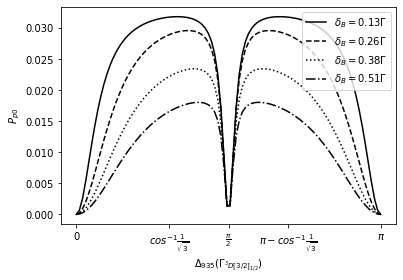

In [14]:
from ion_model import calculate_171_pop, Yb171, Lorentzian

yb171 = Yb171()

# define the polarisation sweep
thetaBE370 = yb171.optimal_thetaBE
thetaBE935 = np.linspace(0, np.pi, 100)
# define other constants
s370 = 1                                # At saturation
s935 = 1                                # At saturation
zeeman = np.linspace(0.13, 0.51, 4)     # half of the linewidth of the 2S1/2 <-> 2P1/2 transition
detuning370 = 5e6 * 2 * np.pi              # Detuning set to -5 MHz
detuning935 = 0 * yb171.Gamma_3D32

linestyles = ['solid', '--', ':', '-.']

# Calculate the population
excited_pop, mesh, yb171, other = calculate_171_pop(detuning370=detuning370, detuning935=detuning935,
                                                                s_370=s370, 
                                                                s_935=s935, 
                                                                zeeman=zeeman * yb171.Gamma_2P12, 
                                                                thetaBE370=thetaBE370,
                                                                thetaBE935=thetaBE935)

for i, det in enumerate(zeeman):
    plt.plot(mesh.thetaBE935[i, :], excited_pop[i, :], linestyle=linestyles[i], color='k', label=f'$\delta_B={round(det, 2)}\Gamma$')
plt.ylabel('$P_{p0}$')
plt.xlabel('$\Delta_{935}(\Gamma_{^3D[3/2]_{1/2}})$')
plt.legend(loc='upper right')
plt.xticks([0, thetaBE370, np.pi/2, np.pi-thetaBE370, np.pi],
            ["0", r"$cos^{-1}\frac{1}{\sqrt{3}}$", r"$\frac{\pi}{2}$", r"$\pi -cos^{-1}\frac{1}{\sqrt{3}}$", "$\pi$"])
plt.show()

### $^{174}Yb^+$ structure ###
Because $^{174}Yb^+$ has an even nuclear number, then $I=0$ and there is no Hyperfine splitting. This can be seen in the figures below, where the right figure shows the cooling transitions of $^{174}Yb^+$.

<p align="center">
<img src="img/General Yb structure.PNG" height="300">
<img src="img/Yb174_cooling.PNG" height="300">
</p>

From Ejtemaee, the excited state population is

\begin{equation}
\mathcal{P}_p = \frac{1}{2}\frac{\frac{\Omega^2}{6}}{\Delta^2+\left(\frac{\Gamma_{174}}{2}\right)^2}
\end{equation}

where

\begin{equation}
\left(\frac{\Gamma_{174}}{2}\right)^2 = \frac{\Omega^2}{6}+\frac{\gamma^2}{4}\frac{\left(1+\frac{16\delta_B^2}{9\gamma^2}\right)\left(1 + \frac{64\delta_B^2}{9\gamma^2}\right)}{1 + \frac{16\delta_B^2}{9\gamma^2}(3\cos^2\theta_{BE}+1)}
\end{equation}

is the effective linewidth.

### Polarisation of 370 laser sweep ###

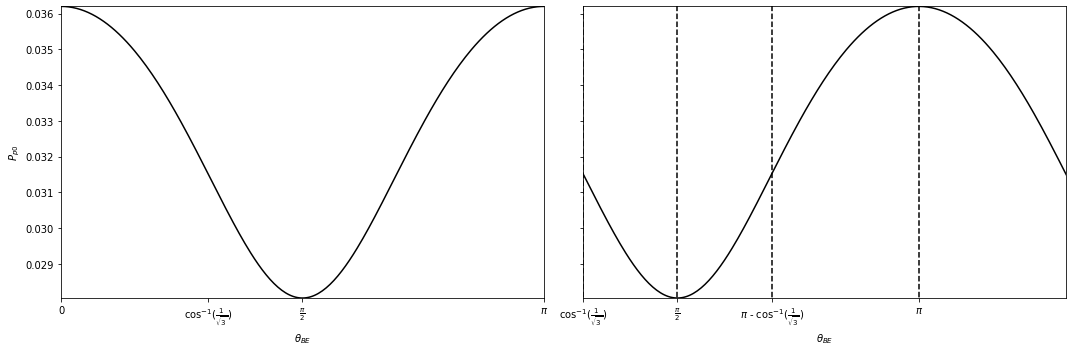

In [15]:
from ion_model import calculate_174_pop, Yb174

yb174 = Yb174()
# define the polarisation sweep
thetaBE370 = np.linspace(0, 2*np.pi, 500)
thetaBE935 = yb174.optimal_thetaBE
# define other constants
s370 = 1                            # At saturation
s935 = 1                            # At saturation
zeeman = 0.5 * yb174.Gamma_2P12     # half of the linewidth of the 2S1/2 <-> 2P1/2 transition
detuning370 = 0.5 * yb174.Gamma_2P12   # Detuning from excited state by half of the linewidth of the 2S1/2 <-> 2P1/2 transition

# Calculate the population
excited_pop, mesh, yb171, other = calculate_174_pop(detuning370=detuning370, s_370=s370, s_935=s935, zeeman=zeeman, 
                                                                thetaBE370=thetaBE370, 
                                                                thetaBE935=thetaBE935)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5), sharey=True)
ax1.plot(mesh.thetaBE370, excited_pop, color='k')
ax1.set_xlim(0, np.pi)
ax1.set_xticks([0, np.arccos(1/np.sqrt(3)), np.pi/2, np.pi])
ax1.set_xticklabels(["0", r"$\cos^{-1}(\frac{1}{\sqrt{3}})$", r"$\frac{\pi}{2}$", "$\pi$"])

ax2.plot(mesh.thetaBE370, excited_pop, color='k')
ax2.set_xlim(np.arccos(1/np.sqrt(3)), np.arccos(1/np.sqrt(3))+np.pi)
ax2.set_xticks([np.arccos(1/np.sqrt(3)), np.pi/2, np.pi - np.arccos(1/np.sqrt(3)), np.pi])
ax2.set_xticklabels([r"$\cos^{-1}(\frac{1}{\sqrt{3}})$", r"$\frac{\pi}{2}$", r"$\pi$ - $\cos^{-1}(\frac{1}{\sqrt{3}})$", "$\pi$"])

ax2.vlines([np.arccos(1/np.sqrt(3)), np.pi/2, np.pi - np.arccos(1/np.sqrt(3)), np.pi], ymin=0, ymax=max(excited_pop), color='k', linestyles='--')

ax1.set_ylabel(r'$P_{p0}$')
ax1.set_xlabel(r'$\theta_{BE}$')
ax2.set_xlabel(r'$\theta_{BE}$')
ax1.set_ylim(min(excited_pop), max(excited_pop))

plt.tight_layout()
plt.show()

### Sweeping 370 satuation parameter ###

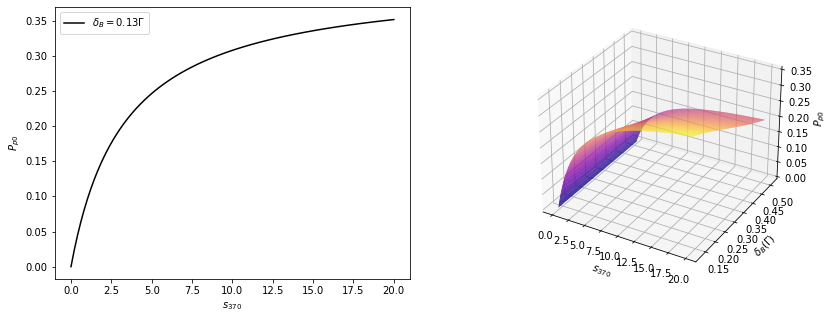

In [16]:
from ion_model import calculate_174_pop, Yb174

yb174 = Yb174()

# define the polarisation sweep
thetaBE370 = yb174.optimal_thetaBE
thetaBE935 = thetaBE370
# define other constants
s370 = np.linspace(0, 20, 100)       # At saturation
s935 = 5                            # At saturation
zeeman = 0.13 * yb174.Gamma_2P12     # half of the linewidth of the 2S1/2 <-> 2P1/2 transition
detuning370 = 5e6 * 2 * np.pi           # Detuning set to -5 MHz

# Calculate the population
excited_pop, mesh, yb174, other = calculate_174_pop(detuning370=detuning370, s_370=s370, s_935=s935, zeeman=zeeman, 
                                                                thetaBE370=thetaBE370, 
                                                                thetaBE935=thetaBE935)

fig = plt.figure(figsize=(14, 5))
ax = fig.add_subplot(1, 2, 1)
ax.plot(mesh.s0_370, excited_pop, color='k', label=r'$\delta_B=0.13\Gamma$')

zeeman = np.linspace(0.13, 0.51, 100)     # half of the linewidth of the 2S1/2 <-> 2P1/2 transition

# Calculate the population
excited_pop, mesh, yb174, other = calculate_174_pop(detuning370=detuning370, s_370=s370, s_935=s935, zeeman=zeeman * yb171.Gamma_2P12, 
                                                                thetaBE370=thetaBE370,
                                                                thetaBE935=thetaBE935)

ax2 = fig.add_subplot(1, 2, 2, projection='3d')
ax2.plot_surface(mesh.s0_370, mesh.zeeman / yb171.Gamma_2P12, excited_pop, cmap='plasma', rstride=1, cstride=1, edgecolor='none')
ax2.set_xlabel('$s_{370}$')
ax2.set_ylabel('$\delta_B(\Gamma)$')
ax2.set_zlabel("$P_{p0}$")

ax.set_xlabel('$s_{370}$')
ax.set_ylabel('$P_{p0}$')
ax.legend()

# plt.tight_layout()
plt.show()

### Sweeping 370 nm Detuning

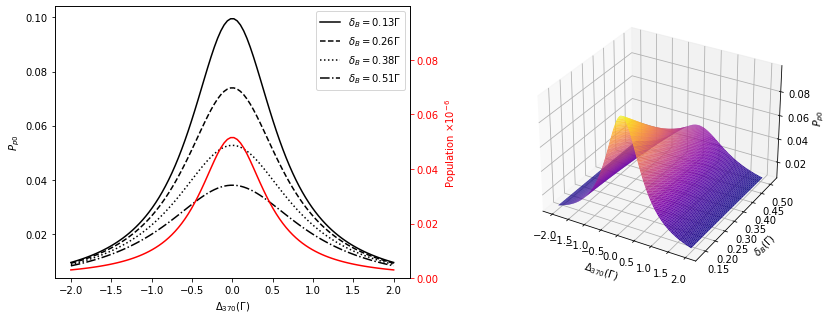

In [17]:
from ion_model import calculate_174_pop, Yb174, Lorentzian

yb174 = Yb174()

# define the polarisation sweep
thetaBE370 = yb174.optimal_thetaBE
thetaBE935 = thetaBE370
# define other constants
s370 = 1                            # At saturation
s935 = 1                            # At saturation
zeeman = np.linspace(0.13, 0.51, 4)     # half of the linewidth of the 2S1/2 <-> 2P1/2 transition
detuning370 = np.linspace(-2, 2, 100) * yb174.Gamma_2P12  # Detuning set to -5 MHz

# Calculate the population
excited_pop, mesh, yb174, other = calculate_174_pop(detuning370=detuning370, s_370=s370, s_935=s935, zeeman=zeeman * yb174.Gamma_2P12, 
                                                                thetaBE370=thetaBE370,
                                                                thetaBE935=thetaBE935)

fig = plt.figure(figsize=(14, 5))
ax = fig.add_subplot(1, 2, 1)
linestyles = ['solid', '--', ':', '-.']
for i, det in enumerate(zeeman):
    ax.plot(mesh.detuning370[i, :] / yb171.Gamma_2P12, excited_pop[i, :], color='k', label=f'$\delta_B={round(det, 2)}\Gamma$', linestyle=linestyles[i])
# Also plot natural linewidth of the 2P1/2 F=0 state
natural_spectrum = Lorentzian(detuning370, 0, yb171.Gamma_2P12) * 10e6
ax_sub = ax.twinx()
natural_line, = ax_sub.plot(detuning370/yb171.Gamma_2P12, natural_spectrum, color='r')
ax_sub.set_ylim(0, np.max(excited_pop))
ax_sub.set_ylabel(r"Population $\times 10^{-6}$")
ax_sub.yaxis.label.set_color(natural_line.get_color())
ax_sub.tick_params(axis='y', colors=natural_line.get_color())


zeeman = np.linspace(0.13, 0.51, 100)     # half of the linewidth of the 2S1/2 <-> 2P1/2 transition

# Calculate the population
excited_pop, mesh, yb174, other = calculate_174_pop(detuning370=detuning370, s_370=s370, s_935=s935, zeeman=zeeman * yb171.Gamma_2P12,
                                                                thetaBE370=thetaBE370,
                                                                thetaBE935=thetaBE935)

ax2 = fig.add_subplot(1, 2, 2, projection='3d')
ax2.plot_surface(mesh.detuning370 / yb171.Gamma_2P12, mesh.zeeman / yb171.Gamma_2P12, excited_pop, cmap='plasma', rstride=1, cstride=1, edgecolor='none')
ax2.set_xlabel('$\Delta_{370}(\Gamma)$')
ax2.set_ylabel('$\delta_B(\Gamma)$')
ax2.set_zlabel("$P_{p0}$")

ax.set_xlabel('$\Delta_{370}(\Gamma)$')
ax.set_ylabel('$P_{p0}$')
ax.legend()

# plt.tight_layout()
plt.show()

### Sweeping saturation parameter $s_{935}$ of 935 nm laser 

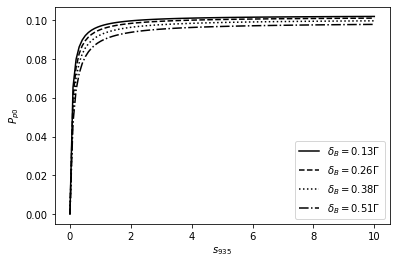

In [18]:
from ion_model import calculate_174_pop, Yb174, Lorentzian

yb174 = Yb174()

# define the polarisation sweep
thetaBE370 = yb174.optimal_thetaBE
thetaBE935 = yb174.optimal_thetaBE
# define other constants
s370 = 1                                # At saturation
s935 = np.linspace(0, 10, 100)           # At saturation
zeeman = np.linspace(0.13, 0.51, 4)     # half of the linewidth of the 2S1/2 <-> 2P1/2 transition
detuning370 = 5e6 * 2 * np.pi           # Detuning set to -5 MHz

linestyles = ['solid', '--', ':', '-.']

# Calculate the population
excited_pop, mesh, yb174, other = calculate_174_pop(detuning370, s_370=s370, s_935=s935, zeeman=zeeman * yb174.Gamma_3D32,
                                                                thetaBE370=thetaBE370,
                                                                thetaBE935=thetaBE935)

for i, det in enumerate(zeeman):
    plt.plot(mesh.s0_935[i, :], excited_pop[i, :], linestyle=linestyles[i], color='k', label=f'$\delta_B={round(det, 2)}\Gamma$')
plt.ylabel('$P_{p0}$')
plt.xlabel('$s_{935}$')
plt.legend()
plt.show()

### Sweeping 935 nm detuning $\Delta_{935}$ 

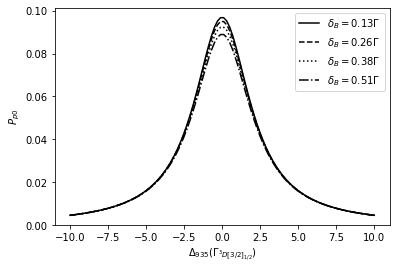

In [19]:
from ion_model import calculate_171_pop, Yb174, Lorentzian

yb174 = Yb174()

# define the polarisation sweep
thetaBE370 = yb174.optimal_thetaBE
thetaBE935 = yb174.optimal_thetaBE
# define other constants
s370 = 1                                # At saturation
s935 = 1                                # At saturation
zeeman = np.linspace(0.13, 0.51, 4)     # half of the linewidth of the 2S1/2 <-> 2P1/2 transition
detuning370 = 5e6 * 2 * np.pi              # Detuning set to -5 MHz
detuning935 = np.linspace(-10, 10, 100) * yb174.Gamma_3D32

linestyles = ['solid', '--', ':', '-.']

# Calculate the population
excited_pop, mesh, yb174, other = calculate_174_pop(detuning370=detuning370, detuning935=detuning935,
                                                                s_370=s370, 
                                                                s_935=s935, 
                                                                zeeman=zeeman * yb174.Gamma_3D32, 
                                                                thetaBE370=thetaBE370,
                                                                thetaBE935=thetaBE935)

for i, det in enumerate(zeeman):
    plt.plot(mesh.detuning935[i, :]/yb174.Gamma_3D32, excited_pop[i, :], linestyle=linestyles[i], color='k', label=f'$\delta_B={round(det, 2)}\Gamma$')
plt.ylabel('$P_{p0}$')
plt.xlabel('$\Delta_{935}(\Gamma_{^3D[3/2]_{1/2}})$')
plt.legend()
plt.show()

### Sweeping $\theta_{BE, 935}$ of 935 nm laser.

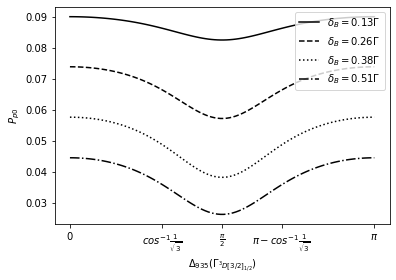

In [20]:
from ion_model import calculate_174_pop, Yb171, Lorentzian

yb174 = Yb174()

# define the polarisation sweep
thetaBE370 = yb171.optimal_thetaBE
thetaBE935 = np.linspace(0, np.pi, 100)
# define other constants
s370 = 1                                # At saturation
s935 = 1                                # At saturation
zeeman = np.linspace(0.13, 0.51, 4)     # half of the linewidth of the 2S1/2 <-> 2P1/2 transition
detuning370 = 5e6 * 2 * np.pi              # Detuning set to -5 MHz
detuning935 = 0 * yb174.Gamma_3D32

linestyles = ['solid', '--', ':', '-.']

# Calculate the population
excited_pop, mesh, yb174, other = calculate_174_pop(detuning370=detuning370, detuning935=detuning935,
                                                                s_370=s370, 
                                                                s_935=s935, 
                                                                zeeman=zeeman * yb174.Gamma_2P12, 
                                                                thetaBE370=thetaBE370,
                                                                thetaBE935=thetaBE935)

for i, det in enumerate(zeeman):
    plt.plot(mesh.thetaBE935[i, :], excited_pop[i, :], linestyle=linestyles[i], color='k', label=f'$\delta_B={round(det, 2)}\Gamma$')
plt.ylabel('$P_{p0}$')
plt.xlabel('$\Delta_{935}(\Gamma_{^3D[3/2]_{1/2}})$')
plt.legend(loc='upper right')
plt.xticks([0, thetaBE370, np.pi/2, np.pi-thetaBE370, np.pi],
            ["0", r"$cos^{-1}\frac{1}{\sqrt{3}}$", r"$\frac{\pi}{2}$", r"$\pi -cos^{-1}\frac{1}{\sqrt{3}}$", "$\pi$"])
plt.show()

### Fitting experiment to results
In this section I will be showing the fitting code used to fit the modelled data to the experimental data. This will be used to optimise flouresence, and for future Physics Informed Neural Networks.

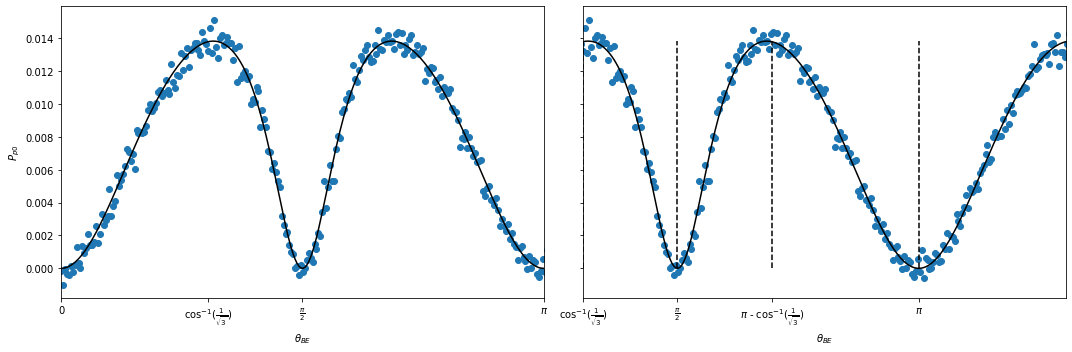

In [21]:
from ion_model import calculate_171_pop, Yb171, GenerateTestData, np, plt

yb171 = Yb171()
# define the True parameters for a polarisation sweep
thetaBE370 = np.linspace(0, 2*np.pi, 500)
thetaBE935 = yb171.optimal_thetaBE
# define other constants
s370 = 1                            # At saturation
s935 = 1                            # At saturation
zeeman = 0.5 * yb171.Gamma_2P12     # half of the linewidth of the 2S1/2 <-> 2P1/2 transition
detuning370 = 0.5 * yb171.Gamma_2P12   # Detuning from excited state by half of the linewidth of the 2S1/2 <-> 2P1/2 transition
detuning935 = 0.0

# Calculate the test data
TestData = GenerateTestData(detuning370=detuning370, 
                            s_370=s370, 
                            s_935=s935, 
                            zeeman=zeeman, 
                            thetaBE370=thetaBE370, 
                            thetaBE935=thetaBE935)

# Randomise test data
TestData.randomise(0.0005**2)

# Calculate the True population
excited_pop, mesh, yb171, other = calculate_171_pop(detuning370=detuning370, s_370=s370, s_935=s935, zeeman=zeeman, 
                                                                thetaBE370=thetaBE370, 
                                                                thetaBE935=thetaBE935,
                                                                make_mesh=False)


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5), sharey=True)

# Plot Test data and true
ax1.scatter(TestData.mesh_171.thetaBE370, TestData.excited_pop_171)
ax1.plot(mesh.thetaBE370, excited_pop, color='k')
ax1.set_xlim(0, np.pi)
ax1.set_xticks([0, np.arccos(1/np.sqrt(3)), np.pi/2, np.pi])
ax1.set_xticklabels(["0", r"$\cos^{-1}(\frac{1}{\sqrt{3}})$", r"$\frac{\pi}{2}$", "$\pi$"])


ax2.scatter(TestData.mesh_171.thetaBE370, TestData.excited_pop_171)
ax2.plot(mesh.thetaBE370, excited_pop, color='k')
ax2.set_xlim(np.arccos(1/np.sqrt(3)), np.arccos(1/np.sqrt(3))+np.pi)
ax2.set_xticks([np.arccos(1/np.sqrt(3)), np.pi/2, np.pi - np.arccos(1/np.sqrt(3)), np.pi])
ax2.set_xticklabels([r"$\cos^{-1}(\frac{1}{\sqrt{3}})$", r"$\frac{\pi}{2}$", r"$\pi$ - $\cos^{-1}(\frac{1}{\sqrt{3}})$", "$\pi$"])

ax2.vlines([np.arccos(1/np.sqrt(3)), np.pi/2, np.pi - np.arccos(1/np.sqrt(3)), np.pi], ymin=0, ymax=max(excited_pop), color='k', linestyles='--')

ax1.set_ylabel(r'$P_{p0}$')
ax1.set_xlabel(r'$\theta_{BE}$')
ax2.set_xlabel(r'$\theta_{BE}$')

plt.tight_layout()
plt.show()

['s_370', 'detuning370', 'detuning935', 's_935', 'zeeman', 'thetaBE935']


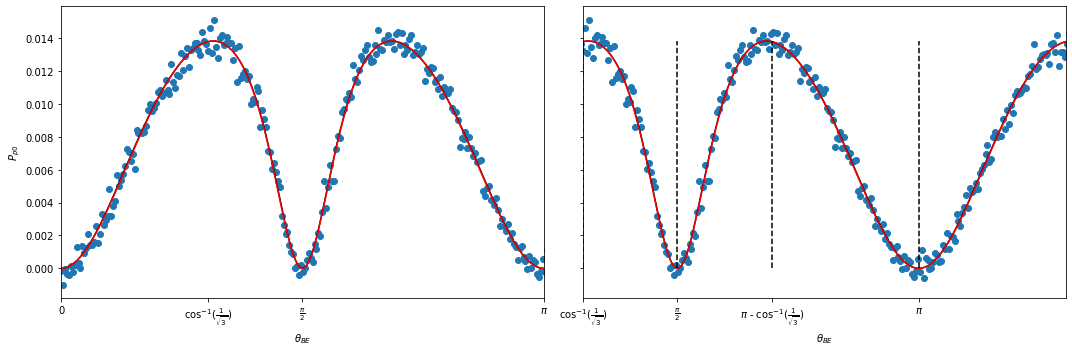

True, fit, Error
s370  1 0.5707372468489633 0.4292627531510367
Detuning 370 (Gamma 2P12)  0.5 0.20363806463037454 0.29636193536962546
Detuning 370 (Gamma 3D32)  0.0 -0.3257974015466308 1.516365683741726
s935  1 1.304669866753646 0.30466986675364605
Zeeman (Gamma 2P12)  0.5 0.3795879711837237 0.12041202881627629
thetaBE935 (rad)  0.9553166181245092 1.170723315066699 0.21540669694218972


In [22]:
# Now lets fit to this test data and compare to the True
from ion_model import FitFreeParams, calculate_171_pop

# The actual data and True parameters is stored in the previous cell. We first have to prepare our data
x = (thetaBE370,)
y = TestData.excited_pop_171
# Var names need to be spelled correctly to work. ValueError will be raised otherwise.
x_var_names = ("thetaBE370",)
yb_model = calculate_171_pop

fitting_tool = FitFreeParams(x, y, x_var_names, yb_model)

# when defining p0 for the fit method, you need to get the order of the parameters correct. You can check this
# by printing FitFreeParams.free_params
print(fitting_tool.free_params)

p0 = [0.9, 5e6 * 2 * np.pi, -0.1e6 * 2 * np.pi, 0.8, 0.4 * yb171.Gamma_2P12, 1]
popt, pcov = fitting_tool.fit(p0=p0)


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5), sharey=True)

# Plot Test data and true
ax1.scatter(TestData.mesh_171.thetaBE370, TestData.excited_pop_171)
ax1.plot(mesh.thetaBE370, excited_pop, color='k')
fitted_population = fitting_tool.fit_func(x, *popt)
ax1.plot(thetaBE370, fitted_population, color='r')
ax1.set_xlim(0, np.pi)
ax1.set_xticks([0, np.arccos(1/np.sqrt(3)), np.pi/2, np.pi])
ax1.set_xticklabels(["0", r"$\cos^{-1}(\frac{1}{\sqrt{3}})$", r"$\frac{\pi}{2}$", "$\pi$"])


ax2.scatter(TestData.mesh_171.thetaBE370, TestData.excited_pop_171)
ax2.plot(mesh.thetaBE370, excited_pop, color='k')
ax2.plot(thetaBE370, fitted_population, color='r')
ax2.set_xlim(np.arccos(1/np.sqrt(3)), np.arccos(1/np.sqrt(3))+np.pi)
ax2.set_xticks([np.arccos(1/np.sqrt(3)), np.pi/2, np.pi - np.arccos(1/np.sqrt(3)), np.pi])
ax2.set_xticklabels([r"$\cos^{-1}(\frac{1}{\sqrt{3}})$", r"$\frac{\pi}{2}$", r"$\pi$ - $\cos^{-1}(\frac{1}{\sqrt{3}})$", "$\pi$"])

ax2.vlines([np.arccos(1/np.sqrt(3)), np.pi/2, np.pi - np.arccos(1/np.sqrt(3)), np.pi], ymin=0, ymax=max(excited_pop), color='k', linestyles='--')

ax1.set_ylabel(r'$P_{p0}$')
ax1.set_xlabel(r'$\theta_{BE}$')
ax2.set_xlabel(r'$\theta_{BE}$')

plt.tight_layout()
plt.show()

print("True, fit, Error")
print("s370 ", s370, popt[0], abs(popt[0] - s370))
print("Detuning 370 (Gamma 2P12) ", detuning370/yb171.Gamma_2P12, popt[1]/yb171.Gamma_2P12, abs(popt[1]-detuning370)/yb171.Gamma_2P12)
print("Detuning 370 (Gamma 3D32) ", detuning935/yb171.Gamma_2P12, popt[2]/yb171.Gamma_2P12, abs(popt[2]-detuning935)/yb171.Gamma_3D32)
print("s935 ", s935, popt[3], abs(popt[3]-s935))
print("Zeeman (Gamma 2P12) ", zeeman/yb171.Gamma_2P12, popt[4]/yb171.Gamma_2P12, abs(popt[4]-zeeman)/yb171.Gamma_2P12)
print("thetaBE935 (rad) ", thetaBE935, popt[5], abs(popt[5]-thetaBE935))



['detuning370', 'detuning935', 's_935', 'zeeman', 'thetaBE935']
True, fit, Error
Detuning 370 (Gamma 2P12)  0.5 0.5069921779592537 0.006992177959253682
Detuning 370 (Gamma 3D32)  0.0 -0.16655514585979725 0.775201110977081
s935  1 0.9991779331711984 0.0008220668288015931
Zeeman (Gamma 2P12)  0.5 0.4817078206234726 0.01829217937652739
thetaBE935 (rad)  0.9553166181245092 1.0492487736715923 0.09393215554708312


c:\Users\s5027305\YbSimulations\ion_model.py:48: RuntimeWarning:

invalid value encountered in sqrt



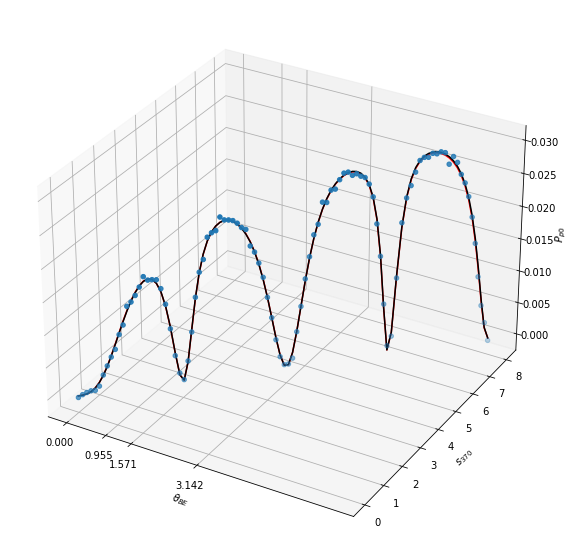

In [23]:
# The accuracy of the fit can be improved by sweeping multiple parameters.

from ion_model import calculate_171_pop, Yb171, GenerateTestData, np, plt, FitFreeParams

yb171 = Yb171()
# define the True parameters for a polarisation sweep
thetaBE370 = np.linspace(0, 2*np.pi, 100)
thetaBE935 = yb171.optimal_thetaBE
# define other constants
s370 = np.linspace(0, 8, 100)       # At saturation
s935 = 1                            # At saturation
zeeman = 0.5 * yb171.Gamma_2P12     # half of the linewidth of the 2S1/2 <-> 2P1/2 transition
detuning370 = 0.5 * yb171.Gamma_2P12   # Detuning from excited state by half of the linewidth of the 2S1/2 <-> 2P1/2 transition
detuning935 = 0.0

# Calculate the test data
TestData = GenerateTestData(detuning370=detuning370, 
                            s_370=s370, 
                            s_935=s935, 
                            zeeman=zeeman, 
                            thetaBE370=thetaBE370, 
                            thetaBE935=thetaBE935, 
                            make_mesh=False)

# Randomise test data
TestData.randomise(0.0005**2)

# Calculate the True population
excited_pop, mesh, yb171, other = calculate_171_pop(detuning370=detuning370, s_370=s370, s_935=s935, zeeman=zeeman, 
                                                                thetaBE370=thetaBE370, 
                                                                thetaBE935=thetaBE935,
                                                                make_mesh=False)


# Now lets fit to this test data and compare to the True

# The actual data and True parameters is stored in the previous cell. We first have to prepare our data
x = (thetaBE370, s370)
y = TestData.excited_pop_171
# Var names need to be spelled correctly to work. ValueError will be raised otherwise.
x_var_names = ("thetaBE370", "s_370")
yb_model = calculate_171_pop

fitting_tool = FitFreeParams(x, y, x_var_names, yb_model)

print(fitting_tool.free_params)

p0 = [5e6 * 2 * np.pi, -0.1e6 * 2 * np.pi, 0.8, 0.4 * yb171.Gamma_2P12, 1]
popt, pcov = fitting_tool.fit(p0=p0)

fitted_population = fitting_tool.fit_func(x, *popt)

fig = plt.figure(figsize=(10, 10))
ax1 = fig.add_subplot(projection='3d')
ax1.plot3D(mesh.thetaBE370, mesh.s0_370, fitted_population, color='r')
# Plot Test data and true
ax1.scatter3D(TestData.mesh_171.thetaBE370, TestData.mesh_171.s0_370, TestData.excited_pop_171)
ax1.plot3D(mesh.thetaBE370, mesh.s0_370, excited_pop, color='k')
# ax1.set_xlim(0, np.pi)
ax1.set_xticks([0, np.arccos(1/np.sqrt(3)), np.pi/2, np.pi])

ax1.set_zlabel(r'$P_{p0}$')
ax1.set_ylabel(r'$s_{370}$')
ax1.set_xlabel(r'$\theta_{BE}$')

print("True, fit, Error")
print("Detuning 370 (Gamma 2P12) ", detuning370/yb171.Gamma_2P12, popt[0]/yb171.Gamma_2P12, abs(popt[0]-detuning370)/yb171.Gamma_2P12)
print("Detuning 370 (Gamma 3D32) ", detuning935/yb171.Gamma_2P12, popt[1]/yb171.Gamma_2P12, abs(popt[1]-detuning935)/yb171.Gamma_3D32)
print("s935 ", s935, popt[2], abs(popt[2]-s935))
print("Zeeman (Gamma 2P12) ", zeeman/yb171.Gamma_2P12, popt[3]/yb171.Gamma_2P12, abs(popt[3]-zeeman)/yb171.Gamma_2P12)
print("thetaBE935 (rad) ", thetaBE935, popt[4], abs(popt[4]-thetaBE935))

# plt.tight_layout()
plt.show()

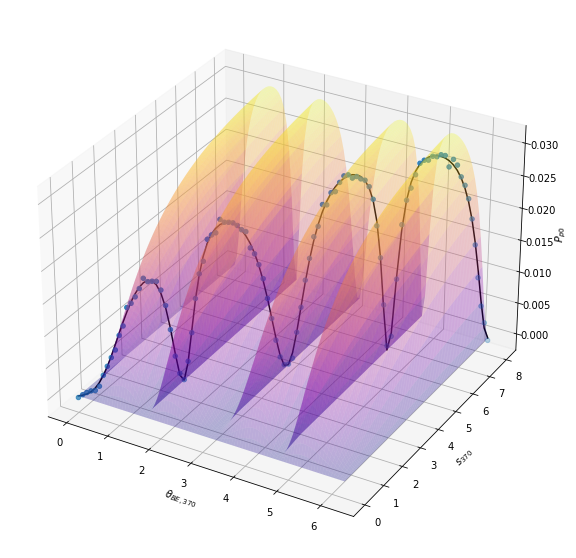

In [24]:
# We can even use these fitted parameters to recalculate our surface
# Calculate the surfaec using fitted params

excited_pop, mesh, yb171, other = calculate_171_pop(detuning370=popt[0], s_370=s370, s_935=popt[2], zeeman=popt[3], 
                                                                thetaBE370=thetaBE370, 
                                                                thetaBE935=popt[4],
                                                                detuning935=popt[1],
                                                                make_mesh=True)

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(projection='3d')

ax.plot_surface(mesh.thetaBE370, mesh.s0_370, excited_pop, cmap='plasma', rstride=1, cstride=1, edgecolor='none', alpha=0.3)
ax.plot3D(thetaBE370, s370, fitted_population, color='k')
ax.scatter3D(TestData.mesh_171.thetaBE370, TestData.mesh_171.s0_370, TestData.excited_pop_171)
ax.set_ylabel('$s_{370}$')
ax.set_xlabel(r'$\theta_{BE, 370}$')
ax.set_zlabel("$P_{p0}$")
plt.show()

### Extract B feild vector
To calculate the B feild vector at the ion, we need to first define the coordinate system. 
The laser beam is assumed to be pointing close to perpendicular to the B feild. The beam is therefore said to travel along the $-\hat{x}$ axis. We want the B-feild to be along the $\hat{z}$ axis, where $\hat{y}$ is perpendicular to the table and pointing up. This is shown in the figure below. The ion is at the origin where the lasers pointing vector, $\bar{B}$ and $\bar{E}$ vectors intersect in the figure. The $\bar{E}$ vector is perpendicular to the lasers pointing vector, and is an angle $\phi_E$ from $\hat{y}$ and $\theta_{BE}$ from $\bar{B}$. We are assuming the electric field is in the $y$-$z$ plane. The $\bar{B}$ vector isn't necessarily aligned with the $\hat{z}$ direction, and is likely pointing in some arbitrary direction.   
<p align="center">
<img src="img/vector_drawing.png" height="300">
</p>

We now hope to calculate the actual vector $\hat{B}$ from the curvefit algorithm. The ion_model package contains a PolarVector class which can be used to define a polar vector, along with methods for converting to cartesian coordinates and calculating the angle between two vectors. Polar vector is defined using conventional spherical polar coordinates

<p align="center">
<img src="img/SphericalCoordinates_1201.png" height="300">
</p>

PolarVector's have built in manipulation methods including

- self.update ; args: r, theta, phi ; update the radius, theta and phi of the vector with new values
- self.rotate_theta_by ; args: radians ; change the angle of theta by an angle
- self.rotate_phi_by ; args: radians ; change the angle of phi by an angle
- self.change_mag ; args: length ; change radius by a length
- self.convert_to_cartesian ; None ; Convert polar to cartesian
- self.rotate_about_x ; args: theta ; Rotate vector about x axis
- self.rotate_about_y ; args: theta ; Rotate vector about y axis
- self.rotate_about_z ; args: theta ; Rotate vector about z axis
- self.translate ; args: translate ; Translates vector in cartesian coordinates by a translation vector
- self.flip ; None ; flips the vector (this needs to be characterised)

In [13]:
from ion_model import PolarVector, CartVector
import numpy as np
from plotly_wrapper import VectorPlot
from pprint import pprint

B = PolarVector(r=1, theta=np.pi/8, phi=np.pi/12)
E = PolarVector(r=1, theta=np.pi/2, phi=np.arccos(1/np.sqrt(3)))
laser_pointing = PolarVector(r=1, theta=0, phi=np.pi/2)


laser_pointing.flip()
laser_pointing.translate(np.array([[0.3, 0.3], [0, 0], [0, 0]]))
vp = VectorPlot()
vp.add_arc_between_vecs(B, E, line={"color": "purple"}, name="θBE", mode="lines+text", text=["θBE"])
vp.add_vector({'B': B, "E": E, "Cooling laser": laser_pointing},
               {"B": {"line": {"color": "green"}, "text": ["", "B"]}, 
                "E": {"line": {"color": "red"}, "text": ["", "E"]},
                "Cooling laser": {"line": {"color": "blue"}, "text": ["Cooling laser", ""]}})

vp.align_vectors_with_experiment()
vp.prepare_plot()
fig = vp.show(title="Experiments vectors")

fig.show()


Using the PolarVector and fitting algorithm, we can begin to figure out where the B vector is.

We assume that the $\hat{B}$ field is close to $\hat{B}_z$, and the $\hat{E}$ field is $\hat{y}$ nominally, but this is swept to get the curve.

In [11]:
# Generate Actual data
from ion_model import PolarVector, unwrap_angle, Yb171, GenerateTestData, FitFreeParams, calculate_171_pop
from plotly_wrapper import VectorPlot, Subplots, go
import matplotlib.pyplot as plt
import numpy as np

vp = VectorPlot()

# Define the true vectors and parameters of the experiment (used to generate test data)
E = PolarVector(r=1, theta=np.pi/2, phi=np.arccos(1/np.sqrt(3)))
B = PolarVector(r=1, theta=0, phi=np.pi/16)
yb171 = Yb171()
# define the True parameters for a polarisation sweep
thetaBE935 = yb171.optimal_thetaBE
# define other constants
s935 = 1                            # At saturation
zeeman = 0.5 * yb171.Gamma_2P12     # half of the linewidth of the 2S1/2 <-> 2P1/2 transition
detuning370 = 0.5 * yb171.Gamma_2P12   # Detuning from excited state by half of the linewidth of the 2S1/2 <-> 2P1/2 transition
detuning935 = 0.0

# Sweep E polarisation and saturation parameter
s370 = np.linspace(0, 8, 51)

# Polarisation is swept using the E PolarVector
num_steps = 50
# angle per step
angle_step = -np.pi/(num_steps)
# Define all the E vectors (magnitude is going up linearly to mimick saturation sweep)
allE = {f"E{i}": PolarVector(r=(i+1)/num_steps, theta=E.theta, phi=E.phi + angle_step * i) for i in range(num_steps + 1)}
# Calculate thetaBE for each of the E vectors
thetaBE370 = np.array([B.calculate_angle_between(Evec) for Evec in allE.values()])
# Get the change in phi
allPhi = [vec.phi for vec in allE.values()]

# Unwrap thetaBE370 array because theta is always pos, but it should go pos to negative
# thetaBE370 = unwrap_angle(thetaBE370)
# Prepare an arc using the x, y, z values of the E vectors
draw_vec_line = np.array([E.v[:, 1] for E in allE.values()])
# Break them out seperately
x, y, z = draw_vec_line[:, 0], draw_vec_line[:, 1], draw_vec_line[:, 2]
# Add the arc to the vector plot
vp.add_line(x=x, y=y, z=z, line={"color": "black", "dash": "dash"}, name="swept pol and saturation")

# Calculate the test data
TestData = GenerateTestData(detuning370=detuning370, 
                            s_370=s370, 
                            s_935=s935, 
                            zeeman=zeeman, 
                            thetaBE370=thetaBE370, 
                            thetaBE935=thetaBE935, 
                            make_mesh=False)

# Randomise test data
TestData.randomise(0.0007**2)

# Now prepare for the fit. We assume the independent variables are known
x = (thetaBE370, s370)
# "Measured" data
y = TestData.excited_pop_171
# Var names need to be spelled correctly to work. ValueError will be raised otherwise.
x_var_names = ("thetaBE370", "s_370")
yb_model = calculate_171_pop

# Pass args into FitFreeParams
fitting_tool = FitFreeParams(x, y, x_var_names, yb_model)

# Check the free parameters
print(fitting_tool.free_params)

# Define initial conditions (in order of fitting_tool.free_params)
p0 = [5e6 * 2 * np.pi, -0.1e6 * 2 * np.pi, 0.8, 0.4 * yb171.Gamma_2P12, 1]
# Fit data
popt, pcov = fitting_tool.fit(p0=p0)

# Re-calculate the curve
fitted_population = fitting_tool.fit_func((thetaBE370, s370), *popt)

# Put test data and curve-fit into graph object
surface_go = [go.Scatter3d(x=allPhi, y=TestData.mesh_171.s0_370, z=TestData.excited_pop_171, mode='markers', marker={"color": "red"}, name="Data")]
surface_go.append(go.Scatter3d(x=allPhi, y=s370, z=fitted_population, mode='lines', line={"color": "black"}, name="Fit"))

# Add vectors
vp.add_vector({"E initial": E}, {"line": {"color": "blue"}, "text": ["", "Ei"]})
vp.add_vector({"B": B}, {"line": {"color": "green"}, "text": ["", "B"]})
vp.add_vector({"E final": allE[f"E{num_steps}"]}, {"line": {"color": "rgba(0, 0, 0, 0.5)", "dash": "dash"}, "text": ["", "Ef"]})

# rotate vector plot
vp.align_vectors_with_experiment()
# prepare plot
vp.prepare_plot()

# use graph objects in vector plot in subplots class. Defining subplots
sub = Subplots(rows=1, cols=2, specs=[[{'type': 'scene'}, {'type': 'scene'}]])
# update subplots with graph objects
sub.update_subplot(1, 2, vp.graph_objects,
                   update_scenes_kwargs=dict(xaxis_visible=False, yaxis_visible=False, zaxis_visible=False))
sub.update_subplot(1, 1, surface_go, 
                   xaxis_kwargs=dict(title_text="thetaBE"), 
                   yaxis_kwargs=dict(title_text="s370"))

# show subplot
sub.fig.show()


['detuning370', 'detuning935', 's_935', 'zeeman', 'thetaBE935']


Now we can begin to estimate our $\hat{B}$ vector. By leaving $B_\theta$, $B_\phi$ as free variables and using it in the `calc_171_pop_using_vectors` function we can estimate the angles. The first example is one where we have constrained all of our variables except $B_\theta$ and $B_\phi$

In [1]:
# Generate Actual data
from ion_model import PolarVector, unwrap_angle, Yb171, GenerateTestData, FitFreeParams, calculate_171_pop, calc_171_pop_using_vectors
from plotly_wrapper import VectorPlot, Subplots, go
import matplotlib.pyplot as plt
import numpy as np
from pprint import pprint
from random import random

vp = VectorPlot()

# Define the true vectors and parameters of the experiment (used to generate test data)
E = PolarVector(r=1, theta=np.pi/2, phi=np.arccos(1/np.sqrt(3)))
random_theta, random_phi = (random()*2-1) * np.pi/2, (random()*2-1) * np.pi/2 
B = PolarVector(r=1, theta=random_theta, phi=random_phi)
yb171 = Yb171()
# define the True parameters for a polarisation sweep
thetaBE935 = yb171.optimal_thetaBE
# define other constants
s935 = 1                            # At saturation
zeeman = 0.5 * yb171.Gamma_2P12     # half of the linewidth of the 2S1/2 <-> 2P1/2 transition
detuning370 = 0.5 * yb171.Gamma_2P12   # Detuning from excited state by half of the linewidth of the 2S1/2 <-> 2P1/2 transition
detuning935 = 0.0

# Sweep E polarisation and saturation parameter
s370 = np.linspace(0, 8, 51)

# Polarisation is swept using the E PolarVector
num_steps = 50
# angle per step
angle_step = -np.pi/(num_steps)
# Define all the E vectors (magnitude is going up linearly to mimick saturation sweep)
allE = {f"E{i}": PolarVector(r=(i+1)/num_steps, theta=E.theta, phi=E.phi + angle_step * i) for i in range(num_steps + 1)}
# Calculate thetaBE for each of the E vectors
thetaBE370 = np.array([B.calculate_angle_between(Evec) for Evec in allE.values()])
# Get the change in phi
allPhi = [vec.phi for vec in allE.values()]

# Unwrap thetaBE370 array because theta is always pos, but it should go pos to negative
# thetaBE370 = unwrap_angle(thetaBE370)
# Prepare an arc using the x, y, z values of the E vectors
draw_vec_line = np.array([E.v[:, 1] for E in allE.values()])
# Break them out seperately
x, y, z = draw_vec_line[:, 0], draw_vec_line[:, 1], draw_vec_line[:, 2]
# Add the arc to the vector plot

# Calculate the test data
TestData = GenerateTestData(detuning370=detuning370, 
                            s_370=s370, 
                            s_935=s935, 
                            zeeman=zeeman, 
                            thetaBE370=thetaBE370, 
                            thetaBE935=thetaBE935, 
                            make_mesh=False)

# Randomise test data
TestData.randomise(0.0007**2)

# This cell only works with the previous one run
# Using our knowledge of E and s
E_array = np.array([E.pv for E in allE.values()])
Er, Etheta, Ephi = np.zeros(E_array.shape[0])+1, E_array[:, 1][:, 0], E_array[:, 2][:, 0]

# Constraining all variables except Btheta, Bphi
x = (np.array([1]*len(s370)), Er, Etheta, Ephi, s370, np.array([detuning370]*len(s370)), np.array([detuning935]*len(s370)), np.array([s935]*len(s370)), np.array([zeeman]*len(s370)), np.array([thetaBE935]*len(s370)))

x_var_names = ("Br", "Er", "Etheta", "Ephi", "s_370", "detuning370", "detuning935", "s_935", "zeeman", "thetaBE935")

# Prepare fitting tool
fitting_tool = FitFreeParams(x, TestData.excited_pop_171, x_var_names, calc_171_pop_using_vectors,
                             all_variables=("Er", "Etheta", "Ephi","s_370", "Br", "Btheta", "Bphi", "detuning370", "detuning935", "s_935", "zeeman", "thetaBE935"))

print(fitting_tool.free_params)

# initial guess
p0 = np.array([0, 0])
# Bounds (assuming B vector is pointing in the +z ish direction. Symmetry means it can be + or - x)
bounds = ((-np.pi/2, -np.pi/2), 
          (np.pi/2, np.pi/2))

# Prepare residuals
residual_ss = 100000
# Residual limit where it stops
res_limit = 1e-4
# Number of itterations if residual limit isn't met initially
itterations = 20
# Initilise itterations
itter = 0

while itter < itterations:
    # Constraining other variables to fix them. Using bounds by setting min max to the actual value
    popt, pcov = fitting_tool.fit(p0=p0, 
                                bounds=bounds)

    fit_pop = fitting_tool.fit_func(x, *popt)
    residual_ss = np.sum((TestData.excited_pop_171 - fit_pop)**2)
    if residual_ss > res_limit:
        # Change to different quadrant
        p0 = (p0 + (itter % 2 - 1)*np.array([np.pi/4, np.pi/4])) % np.pi/2
    else:
        break
    itter += 1
    if itter == itterations:
        print("Itterations exceeded maximum. Use different initial condition")

# Use fitted parameters to re-generate B
found_B = PolarVector(r=1, theta=popt[0], phi=popt[1])
# Plot
vp.add_vector({"fitB": found_B}, {"line": {"color": "blue", "dash": "dash"}, "text": ["", "fitB"]})

# Print results
true = np.array([B.theta, B.phi])
diff = np.abs(np.abs(true) - np.abs(popt))
print("True")
pprint({name: value for name, value in zip(fitting_tool.free_params, true)})
print("Fit")
pprint({name: value for name, value in zip(fitting_tool.free_params, popt)})
print("Difference")
pprint({name: value for name, value in zip(fitting_tool.free_params, diff)})
# print(popt)


# Put test data and curve-fit into graph object
surface_go = [go.Scatter3d(x=allPhi, y=TestData.mesh_171.s0_370, z=TestData.excited_pop_171, mode='markers', marker={"color": "blue"}, name="Data")]
surface_go.append(go.Scatter3d(x=allPhi, y=s370, z=fit_pop, mode='lines', line={"color": "black"}, name="Fit"))

# Add vectors
vp.add_vector({"E initial": E}, {"line": {"color": "red"}, "text": ["", "Ei"]})
vp.add_vector({"B": B}, {"line": {"color": "green"}, "text": ["", "B"]})
vp.add_vector({"E final": allE[f"E{num_steps}"]}, {"line": {"color": "rgba(0, 0, 0, 0.5)", "dash": "dash"}, "text": ["", "Ef"]})

# rotate vector plot
vp.align_vectors_with_experiment()
# prepare plot
vp.prepare_plot()

# use graph objects in vector plot in subplots class. Defining subplots
sub = Subplots(rows=1, cols=2, specs=[[{'type': 'scene'}, {'type': 'scene'}]])
# update subplots with graph objects
sub.update_subplot(1, 2, vp.graph_objects,
                   update_scenes_kwargs=dict(xaxis_visible=False, yaxis_visible=False, zaxis_visible=False))
sub.update_subplot(1, 1, surface_go, 
                   xaxis_kwargs=dict(title_text="thetaBE"), 
                   yaxis_kwargs=dict(title_text="s370"))

# show subplot
sub.fig.show()


['Btheta', 'Bphi']
True
{'Bphi': -1.1102553898471792, 'Btheta': -0.6577163417631762}
Fit
{'Bphi': 1.1135220526039105, 'Btheta': 0.6517595428833509}
Difference
{'Bphi': 0.0032666627567312645, 'Btheta': 0.005956798879825254}


c:\Users\s5027305\YbSimulations\ion_model.py:171: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  self.v = np.array([[0, x], [0, y], [0, z]])
c:\Users\s5027305\YbSimulations\ion_model.py:115: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  self.pv = np.array([[self.r], [self.theta], [self.phi]])


Lets increase the number of free parameters to see how well the B fit still works

In [2]:
# Generate Actual data
from ion_model import PolarVector, unwrap_angle, Yb171, GenerateTestData, FitFreeParams, calculate_171_pop, calc_171_pop_using_vectors
from plotly_wrapper import VectorPlot, Subplots, go
import matplotlib.pyplot as plt
import numpy as np
from pprint import pprint
from random import random

vp = VectorPlot()

# Define the true vectors and parameters of the experiment (used to generate test data)
E = PolarVector(r=1, theta=np.pi/2, phi=np.arccos(1/np.sqrt(3)))
random_theta, random_phi = (random()*2-1) * np.pi/2, (random()*2-1) * np.pi/2 
B = PolarVector(r=1, theta=random_theta, phi=random_phi)
yb171 = Yb171()
# define the True parameters for a polarisation sweep
thetaBE935 = yb171.optimal_thetaBE
# define other constants
s935 = 1                            # At saturation
zeeman = 0.5 * yb171.Gamma_2P12     # half of the linewidth of the 2S1/2 <-> 2P1/2 transition
detuning370 = 0.5 * yb171.Gamma_2P12   # Detuning from excited state by half of the linewidth of the 2S1/2 <-> 2P1/2 transition
detuning935 = 0.0

# Sweep E polarisation and saturation parameter
s370 = np.linspace(0, 8, 51)

# Polarisation is swept using the E PolarVector
num_steps = 50
# angle per step
angle_step = -np.pi/(num_steps)
# Define all the E vectors (magnitude is going up linearly to mimick saturation sweep)
allE = {f"E{i}": PolarVector(r=(i+1)/num_steps, theta=E.theta, phi=E.phi + angle_step * i) for i in range(num_steps + 1)}
# Calculate thetaBE for each of the E vectors
thetaBE370 = np.array([B.calculate_angle_between(Evec) for Evec in allE.values()])
# Get the change in phi
allPhi = [vec.phi for vec in allE.values()]

# Unwrap thetaBE370 array because theta is always pos, but it should go pos to negative
# thetaBE370 = unwrap_angle(thetaBE370)
# Prepare an arc using the x, y, z values of the E vectors
draw_vec_line = np.array([E.v[:, 1] for E in allE.values()])
# Break them out seperately
x, y, z = draw_vec_line[:, 0], draw_vec_line[:, 1], draw_vec_line[:, 2]
# Add the arc to the vector plot
vp.add_line(x=x, y=y, z=z, line={"color": "black", "dash": "dash"}, name="swept pol and saturation")


# Calculate the test data
TestData = GenerateTestData(detuning370=detuning370, 
                            s_370=s370, 
                            s_935=s935, 
                            zeeman=zeeman, 
                            thetaBE370=thetaBE370, 
                            thetaBE935=thetaBE935, 
                            make_mesh=False)

# Randomise test data
TestData.randomise(0.0007**2)

# This cell only works with the previous one run
# Using our knowledge of E and s
E_array = np.array([E.pv for E in allE.values()])
Er, Etheta, Ephi = np.zeros(E_array.shape[0])+1, E_array[:, 1][:, 0], E_array[:, 2][:, 0]

# Constraining all variables except Btheta, Bphi
x = (np.array([1]*len(s370)), Er, Etheta, Ephi, s370, np.array([detuning370]*len(s370)), np.array([s935]*len(s370)), np.array([thetaBE935]*len(s370)))

x_var_names = ("Br", "Er", "Etheta", "Ephi", "s_370", "detuning370", "s_935", "thetaBE935")

# Prepare fitting tool
fitting_tool = FitFreeParams(x, TestData.excited_pop_171, x_var_names, calc_171_pop_using_vectors,
                             all_variables=("Er", "Etheta", "Ephi","s_370", "Br", "Btheta", "Bphi", "detuning370", "detuning935", "s_935", "zeeman", "thetaBE935"))

print(fitting_tool.free_params)

# initial guess
p0 = np.array([0, 0, -5*10e6 * 2 * np.pi, 0.3 * yb171.Gamma_2P12])
# Bounds (assuming B vector is pointing in the +z ish direction. Symmetry means it can be + or - x)
bounds = ((-np.pi/2, -np.pi/2, -np.inf, -np.inf), 
          (np.pi/2, np.pi/2, np.inf, np.inf))

# Prepare residuals
residual_ss = 100000
# Residual limit where it stops
res_limit = 1e-4
# Number of itterations if residual limit isn't met initially
itterations = 20
# Initilise itterations
itter = 0

while itter < itterations:
    # Constraining other variables to fix them. Using bounds by setting min max to the actual value
    popt, pcov = fitting_tool.fit(p0=p0, 
                                bounds=bounds)

    fit_pop = fitting_tool.fit_func(x, *popt)
    residual_ss = np.sum((TestData.excited_pop_171 - fit_pop)**2)
    if residual_ss > res_limit:
        # Change to different quadrant
        p0[:2] = (p0[:2] + (itter % 2 - 1)*np.array([np.pi/4, np.pi/4])) % np.pi/2
    else:
        break
    itter += 1
    if itter == itterations:
        print("Itterations exceeded maximum. Use different initial condition")

# Use fitted parameters to re-generate B
found_B = PolarVector(r=1, theta=popt[0], phi=popt[1])
# Plot
vp.add_vector({"fitB": found_B}, {"line": {"color": "red", "dash": "dash"}, "text": ["", "fitB"]})

# Print results
true = np.array([B.theta, B.phi, detuning370, zeeman])
diff = np.abs(np.abs(true) - np.abs(popt))
print("True")
pprint({name: value for name, value in zip(fitting_tool.free_params, true)})
print("Fit")
pprint({name: value for name, value in zip(fitting_tool.free_params, popt)})
print("Difference")
pprint({name: value for name, value in zip(fitting_tool.free_params, diff)})
# print(popt)


# Put test data and curve-fit into graph object
surface_go = [go.Scatter3d(x=allPhi, y=TestData.mesh_171.s0_370, z=TestData.excited_pop_171, mode='markers', marker={"color": "blue"}, name="Data")]
surface_go.append(go.Scatter3d(x=allPhi, y=s370, z=fit_pop, mode='lines', line={"color": "black"}, name="Fit"))

# Add vectors
vp.add_vector({"E initial": E}, {"line": {"color": "red"}, "text": ["", "Ei"]})
vp.add_vector({"B": B}, {"line": {"color": "green"}, "text": ["", "B"]})
vp.add_vector({"E final": allE[f"E{num_steps}"]}, {"line": {"color": "rgba(0, 0, 0, 0.5)", "dash": "dash"}, "text": ["", "Ef"]})

# rotate vector plot
vp.align_vectors_with_experiment()
# prepare plot
vp.prepare_plot()

# use graph objects in vector plot in subplots class. Defining subplots
sub = Subplots(rows=1, cols=2, specs=[[{'type': 'scene'}, {'type': 'scene'}]])
# update subplots with graph objects
sub.update_subplot(1, 2, vp.graph_objects,
                   update_scenes_kwargs=dict(xaxis_visible=False, yaxis_visible=False, zaxis_visible=False))
sub.update_subplot(1, 1, surface_go, 
                   xaxis_kwargs=dict(title_text="thetaBE"), 
                   yaxis_kwargs=dict(title_text="s370"))

# show subplot
sub.fig.show()

['Btheta', 'Bphi', 'detuning935', 'zeeman']
True
{'Bphi': -0.6470661773329979,
 'Btheta': 0.11288498894716101,
 'detuning935': 61728395.061728396,
 'zeeman': 61728395.061728396}
Fit
{'Bphi': 0.6143334403485525,
 'Btheta': -0.12761146496427017,
 'detuning935': 25514346.15988338,
 'zeeman': 53284446.044993855}
Difference
{'Bphi': 0.03273273698444534,
 'Btheta': 0.014726476017109164,
 'detuning935': 36214048.901845016,
 'zeeman': 8443949.01673454}


c:\Users\s5027305\YbSimulations\ion_model.py:171: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.

c:\Users\s5027305\YbSimulations\ion_model.py:115: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.



## Using experimental parameters
In the current code we sweep the variables $s_{370}$, $s_{935}$, $\delta_B$, $\Delta_{370}$, $\Delta_{935}$, $\theta_{BE, 370}$ and $\theta_{BE, 935}$. However, when we run the experiment we can't sweep these parameters exactly. For example, for the saturation parameters, we can instead change the power of the lasers. The power is related to intensity by based on the area of the target

\begin{equation}
P = IA
\end{equation}

and the saturation parameter is given in terms of power by 

\begin{equation}
s_0 = \frac{I}{I_{sat}}
\end{equation}

where

\begin{equation}
I_{sat} = \frac{\pi h c}{3\lambda^3}\gamma
\end{equation}

The next section will discuss converting experimental parameters to these 7 simulation parameters for fitting. 

### Saturation parameters
It should be obvious that using either Power or Intensity in the saturation parameter is equivilent

$$I=\frac{P}{A}$$
$$s_0 = \frac{AP}{AP_{sat}}$$
$$ = \frac{P}{P_{sat}}$$

Therefore, we only need to fit for $P_{sat}$. The $s_0$ parameter can be calculated from that fit. We can even measure the area of the target by calculating for $A$

$$I_{sat}=\frac{P_{sat}}{A}$$
$$A=\frac{P_{sat}}{I_{sat}}$$

From this we can use a beam profiler to measure the actual spot size and optimise it at the focal point to get as close as possible to the theoretical saturation as possible.

### $\Delta$, $\delta_B$ and $\theta_{BE}$
These parameters are all fine in the experiment. We can use actual detuning values and we can measure zeeman shift. 

$\theta_{BE}$ for the cooling laser is controlled using a con-optics EO. This has voltages from 0-1V which correspond to an angle of 0-$\pi$ radians. This is a linear mapping so it isn't difficult to calculate for.

\begin{equation}
\phi_{E,370} = \pi V_{EO} 
\end{equation}

### Optimising B field experimentally
The B field is provided by 4 Helmholtz coils. These are orientated along the $\hat{x}+\hat{z}$, $\hat{x}-\hat{z}$ axes and in the $\hat{y}$ axis as shown in the figure by the red lines/circles (representing coils perpendicular and parallel to the top down perspective)

<p align="center">
<img src="img/trap_setup.png" height="300">
</p>

Our goal is to change the current in each of these coils to align the B field to be perpendicular with the E field of the cooling laser. We could do complicated simulations to figure out what our expected change in magnetic field would be given a change in current, as is done in helmholtz.ipynb. Instead, we will just assume that $B\propto I$, and so we will pretend that we can control the B field vector by changing the current values as a vector.

$$\bar{B}=\bar{B}_{x}+\bar{B}_{y}+\bar{B}_{z}+\bar{B}_{\text{main}}+\bar{B}_{\text{ext}}$$
$$ \propto I_x \hat{i} + I_y \hat{j} + I_z \hat{k} + \bar{I}_{\text{ext, equiv}}$$

I've written the external field as being produced by an equivilent current. From this we can begin calculating the corrections.

$$\Delta \bar{B} = \bar{B}_{\text{actual}} - \bar{B}_{\text{target}} = \Delta r \hat{r} + \Delta\theta \hat{\theta} + \Delta\phi \hat{\phi}$$
$$=\Delta x \hat{i} + \Delta y \hat{j} + \Delta z \hat{k}$$

We can begin to perform a gradient descent algorithm to minimise this difference. Based on the $\Delta$'s, we can change $I_x$, $I_y$, $I_z$ together but reduce the change by a "learning rate" $l$. So our next estimate will be

$$B_{i, n+1}\propto I_i - l\Delta B_{i, n}$$

Where $B_i$ is the $i^\text{th}$ element of the B and I vectors respectively, while $n$ is the iteration step. This is equivilent to just the Proportional component of a PID control loop. This can be simulated using our helmholtz simulation we described earlier.

As an example, this code block creates 4 helmholtz coils in approximately the right position as we have in our experiment. We can then calculate the magnetic fields of these coils and show them. Finally we can sample a point in space (we used the origin in this example) that we say is where our ion is. The magnetic field at this point gives us the True B field that the ion is experiencing.


In [19]:
from B_field_sources import experimental_setup, show_coils, magpy, PolarVector, np, show_fields, add_uniform_field
from plotly_wrapper import VectorPlot, Subplots

# Prepare vector plot axes
vp = VectorPlot(axis_size=400)

# Get the experimental coils
coils = experimental_setup()

# Measure the B field at origin
sensor_location = (0, 0, 0)
measured_B_field = magpy.getB(coils, sensor_location)

# Add a uniform external feild using PolarVector
uniform_background_field = PolarVector(r=0.02, theta=0, phi=0)

# Change measured field to include uniform background field
measured_B_field = add_uniform_field(uniform_background_field, measured_B_field)

# Convert measured_B_field into a PolarVector using the cartesian coordiantes argument
vec = PolarVector(cartesian=tuple(measured_B_field))

# Scale the measured B vector to 200 mm 
scale_measured_b = 200
vec.scale_mag(1/vec.r * scale_measured_b)

# Rotate the displayed axes to align with the previous examples.
# vp.align_vectors_with_experiment()
vp.rotate_about_z(theta=-np.pi/2)
vp.rotate_about_y(theta=-np.pi/2)

# Add measured B vector to the vector plot class and prepare it for plotting
vp.add_vector({f"B vector at origin (scaled to {scale_measured_b} mm)": vec}, dict(line=dict(color="red")))
vp.prepare_plot()

# Get figure from show coils
fig = show_coils(coils, backend='plotly', showlegend=False, return_fig=True)

# Calculate the fields using the coils with a uniform background field
field_trace = show_fields(coils, uniform_field_vector=uniform_background_field)

# Add the field trace and the vector plot traces
fig.add_traces(field_trace)
for trace in vp.graph_objects:
    fig.add_traces(trace)

sub = Subplots(rows=1, cols=2, specs=[[{'type': 'scene'}, {'type': 'scene'}]])
sub.update_subplot(1, 1, fig.data, xaxis_kwargs=dict(range=[-300, 300]), yaxis_kwargs=dict(range=[-300, 300]),
                   update_scenes_kwargs=dict(xaxis_visible=False, yaxis_visible=False, zaxis_visible=False))

vp.reset_plot()
vp.rotate_about_z(theta=np.pi/2)
vp.prepare_plot()

sub.update_subplot(1, 2, vp.graph_objects, update_scenes_kwargs=dict(xaxis_visible=False, yaxis_visible=False, zaxis_visible=False))

sub.layout(scene=dict(zaxis=dict(range=[-300, 300])))
sub.fig.show()

7 105 1575


We can now go over the control software that uses the currents in the coils to get the target B vector and the actual B vector as close as possible. 

In [18]:
from B_field_sources import make_coil_dict, get_current_in_coil, change_coil_current

# First define the target B field (Previous cell needs to be run for this cell to run)
Target = PolarVector(1, 0, 0)

ion_location = (0, 0, 0)
ion_B = magpy.getB(coils, ion_location)

# Add a uniform external feild using PolarVector
uniform_background_field = PolarVector(r=0.02, theta=0, phi=0)

# Change measured field to include uniform background field
ion_B = add_uniform_field(uniform_background_field, ion_B)

# Convert measured_B_field into a PolarVector using the cartesian coordiantes argument
Actual = PolarVector(cartesian=tuple(ion_B))

# Adjust size of Actual. We only care about the angles for now, the scale we can adjust later
Actual.scale_mag(1/Actual.r)

# Calculate the difference between the actual and target
error = Target.v[:, 1] - Actual.v[:, 1]
learning_rate = 0.0

# Only changing compensation coils, not main coils. Set number of iterations and make the coils into a dictionary for easily sorting.
iterations = 50
coils_dict = make_coil_dict(coils)
for i in range(iterations):
    x_coil, y_coil, z_coil = coils_dict['x'], coils_dict['y'], coils_dict['z']

    # Get the current x, y, z currents
    current_Ix = get_current_in_coil(x_coil)
    current_Iy = get_current_in_coil(y_coil)
    current_Iz = get_current_in_coil(z_coil)

    print(current_Ix, current_Iy, current_Iz)
    
    # Calculate the adjusted currents
    new_Ix = current_Ix - error[0] * learning_rate
    new_Iy = current_Iy - error[1] * learning_rate
    new_Iz = current_Iz - error[2] * learning_rate

    print(new_Ix, new_Iy, new_Iz)

    # Set the coils currents
    change_coil_current(x_coil, new_Ix)
    change_coil_current(y_coil, new_Iy)
    change_coil_current(z_coil, new_Iz)

    # New actual
    ion_B = magpy.getB(coils, ion_location)

    # Change measured field to include uniform background field
    ion_B = add_uniform_field(uniform_background_field, ion_B)

    # Convert measured_B_field into a PolarVector using the cartesian coordiantes argument
    Actual = PolarVector(cartesian=tuple(ion_B))

    # Adjust size of Actual. We only care about the angles for now, the scale we can adjust later
    Actual.scale_mag(1/Actual.r)

    # update error
    error = Target.v[:, 1] - Actual.v[:, 1]

    print(sum(error))


vp = VectorPlot()
vp.add_vector({"Target": Target})
vp.align_vectors_with_experiment()
vp.add_vector({"Actual": Actual})
vp.prepare_plot()

vp.show()

1.900118529193116 1349.4471295205585 182.88198962710834
1.900118529193116 1349.4471295205585 182.88198962710834
0.3034385982818378
1.900118529193116 1349.4471295205585 182.88198962710834
1.900118529193116 1349.4471295205585 182.88198962710834
0.3034385982818378
1.900118529193116 1349.4471295205585 182.88198962710834
1.900118529193116 1349.4471295205585 182.88198962710834
0.3034385982818378
1.900118529193116 1349.4471295205585 182.88198962710834
1.900118529193116 1349.4471295205585 182.88198962710834
0.3034385982818378
1.900118529193116 1349.4471295205585 182.88198962710834
1.900118529193116 1349.4471295205585 182.88198962710834
0.3034385982818378
1.900118529193116 1349.4471295205585 182.88198962710834
1.900118529193116 1349.4471295205585 182.88198962710834
0.3034385982818378
1.900118529193116 1349.4471295205585 182.88198962710834
1.900118529193116 1349.4471295205585 182.88198962710834
0.3034385982818378
1.900118529193116 1349.4471295205585 182.88198962710834
1.900118529193116 1349.4471

### Counts to population
We are measuring the floursence of the Yb atom across $^2S_{1/2} F=1\leftrightarrow ^2P_{1/2} F=0$ states with a wavelength of 369 nm. Flouresence of this transition gives us an understanding of the population of the $^2S_{1/2} F=1$ hyperfine ground states because of the short lifetime of the excited state. This hyperfine ground state is known as the bright state because if populated it will lead to floursence when excited. The $^2S_{1/2} F=0$ hyperfine state is then considered a dark state because it does not resonant with the 369 laser. As such, population in this state will lead to a loss of floursence if driven with this laser. 

The rate of photon emission when driven across the 369 nm line is then proportional to the rate of spontaneous decay and the population of the excited state

$$R=\Gamma\mathcal{P}_{p0}$$

If we collect the emitted photons with an efficiency $\eta$ in a duration $T$, then on average we would expect to measure

$$\lambda = \eta \Gamma \mathcal{P}_{p0} T$$

photons. The probability of measuring a photon after a single shot will follow a poissonian distribution for a well stabilsed laser (both in frequency and power) 

$$P(k, \lambda) = e^{-\lambda} \frac{\lambda^k}{k!}$$